In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,Huber,MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError

from tensorflow.keras.optimizers import Adam

In [ ]:
header =["t4","t7","d4","d7"]
data = pd.read_csv("arrival_data.csv",",")
print(data.shape)
data.head()


(4400, 10)


<ipython-input-5-a52af7288ab1>:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("arrival_data.csv",",")


,Index,phase,distance_node_4,distance_node_7,Time_4_1,Time_4_2,Time_4_3,Time_7_1,Time_7_2,Time_7_3
0,1,1,1000,19000,0.010003,0.010003,0.010003,0.010058,0.010058,0.010058
1,2,1,100,19900,0.010000,0.010000,0.010000,0.010060,0.010060,0.010060
2,3,1,1050,18950,0.010003,0.010003,0.010003,0.010058,0.010058,0.010058
3,4,1,1100,18900,0.010003,0.010003,0.010003,0.010057,0.010057,0.010057
4,5,1,1150,18850,0.010004,0.010004,0.010004,0.010057,0.010057,0.010057


In [ ]:
print(data)

      Index  phase  distance_node_4  distance_node_7  Time_4_1  Time_4_2  \
0         1      1             1000            19000  0.010003  0.010003   
1         2      1              100            19900  0.010000  0.010000   
2         3      1             1050            18950  0.010003  0.010003   
3         4      1             1100            18900  0.010003  0.010003   
4         5      1             1150            18850  0.010004  0.010004   
...     ...    ...              ...              ...       ...       ...   
4395   4396      3            29909            10091  0.010186  0.010186   
4396   4397      3            29063            10937  0.010181  0.010181   
4397   4398      3            29045            10955  0.010181  0.010094   
4398   4399      3            29027            10973  0.010181  0.010094   
4399   4400      3            29009            10991  0.010181  0.010094   

      Time_4_3  Time_7_1  Time_7_2  Time_7_3  
0     0.010003  0.010058  0.010058  0.01

In [ ]:
tf_data = tf.constant(data)
print(tf_data)

tf.Tensor(
[[1.0000000e+00 1.0000000e+00 1.0000000e+03 ... 1.0057625e-02
  1.0057625e-02 1.0057625e-02]
 [2.0000000e+00 1.0000000e+00 1.0000000e+02 ... 1.0060350e-02
  1.0060375e-02 1.0060375e-02]
 [3.0000000e+00 1.0000000e+00 1.0500000e+03 ... 1.0057500e-02
  1.0057500e-02 1.0057500e-02]
 ...
 [4.3980000e+03 3.0000000e+00 2.9045000e+04 ... 1.0033225e-02
  1.0033225e-02 1.0033225e-02]
 [4.3990000e+03 3.0000000e+00 2.9027000e+04 ... 1.0033275e-02
  1.0033275e-02 1.0033275e-02]
 [4.4000000e+03 3.0000000e+00 2.9009000e+04 ... 1.0033325e-02
  1.0033325e-02 1.0033325e-02]], shape=(4400, 10), dtype=float64)


In [ ]:
tf_data = tf.random.shuffle(tf_data)
print(tf_data)

tf.Tensor(
[[1.2000000e+03 2.0000000e+00 1.1000000e+03 ... 1.0057325e-02
  1.0057325e-02 1.0057325e-02]
 [1.6190000e+03 2.0000000e+00 3.0750000e+03 ... 0.0000000e+00
  1.0070000e-02 0.0000000e+00]
 [1.5830000e+03 2.0000000e+00 2.2750000e+03 ... 1.0945425e-02
  1.0067575e-02 0.0000000e+00]
 ...
 [1.5930000e+03 2.0000000e+00 2.5000000e+02 ... 0.0000000e+00
  1.0061425e-02 0.0000000e+00]
 [1.6490000e+03 2.0000000e+00 3.7500000e+02 ... 0.0000000e+00
  1.0061800e-02 0.0000000e+00]
 [3.7060000e+03 3.0000000e+00 2.2113000e+04 ... 1.0006425e-02
  1.0006425e-02 1.0006425e-02]], shape=(4400, 10), dtype=float64)


In [ ]:


x = []
print(x)
y = []

for i in range(len(tf_data)):
  if tf_data[i,1] == 1:

    x.append([tf_data[i,4].numpy(),tf_data[i,7].numpy()])
    y.append([tf_data[i,2].numpy(),tf_data[i,3].numpy()])
  elif tf_data[i,1] == 2:

    x.append([tf_data[i,5].numpy(),tf_data[i,8].numpy()])
    y.append([tf_data[i,2].numpy(),tf_data[i,3].numpy()])
  elif tf_data[i,1] == 3:

    x.append([tf_data[i,6].numpy(),tf_data[i,9].numpy()])
    y.append([tf_data[i,2].numpy(),tf_data[i,3].numpy()])
print(x)
print(y)
x_data = tf.constant(x)
y_data = tf.constant(y)
print(x_data.shape)
print(y_data.shape)
print(x_data)
print(y_data)

[]
[[0.01000335, 0.010057325], [0.01000935, 0.01007], [0.010006925, 0.010067575], [0.01003125, 0.010029425], [0.0100171, 0.010043575], [0.0100427, 0.010017975], [0.01009055, 0.01003075], [0.010004725, 0.010055975], [0.010020025, 0.010040625], [0.0100184, 0.01007905], [0.010085475, 0.010024825], [0.01007455, 0.01004675], [0.010019125, 0.01004155], [0.010040775, 0.010080525], [0.010010475, 0.0100502], [0.010040425, 0.01002025], [0.010028425, 0.010089075], [0.0100473, 0.01001335], [0.01008805, 0.0100274], [0.0100443, 0.010077025], [0.0100288, 0.010089475], [0.0100735, 0.010012825], [0.010044825, 0.010015825], [0.010005625, 0.0100663], [0.01002395, 0.010036725], [0.010003125, 0.01005755], [0.0100132, 0.010047475], [0.01003775, 0.0100836], [0.0100815, 0.010039825], [0.0100436, 0.010017075], [0.010033675, 0.010027], [0.01005125, 0.010070075], [0.01008405, 0.01003725], [0.01004265, 0.01001805], [0.01001685, 0.010043825], [0.01007675, 0.0100161], [0.010010325, 0.010071], [0.010015175, 0.010045

In [ ]:
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1
dataset_size = len(x_data)

In [ ]:
x_train = x_data[:int(dataset_size*train_ratio)]
y_train = y_data[:int(dataset_size*train_ratio)]
print(x_train.shape)
print(y_train.shape)
x_val = x_data[int(dataset_size*train_ratio):int(dataset_size*(train_ratio+val_ratio))]
y_val = y_data[int(dataset_size*train_ratio):int(dataset_size*(train_ratio+val_ratio))]
print(x_val.shape)
print(y_val.shape)
x_test = x_data[int(dataset_size*(train_ratio+val_ratio)):]
y_test = y_data[int(dataset_size*(train_ratio+val_ratio)):]
print(x_test.shape)
print(y_test.shape)


(3520, 2)
(3520, 2)
(440, 2)
(440, 2)
(440, 2)
(440, 2)


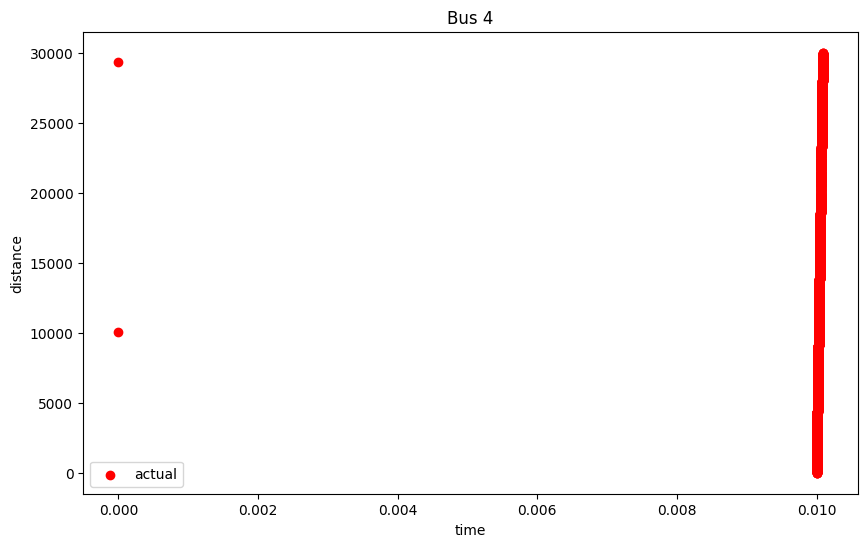

In [ ]:
#prediction = y_pred[:, 0]
distance_train = y_train[:, 0]
time = x_train[:, 0]

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Scatter plot for distance vs. time
#plt.scatter(time, prediction, label='prediction', color='blue', marker='o')

# Scatter plot for distance_2 vs. time
plt.scatter(time, distance_train, label='actual', color='red', marker='o')

# Label for the x-axis and y-axis
plt.xlabel('time')
plt.ylabel('distance')
#plt.xlim(xmin=0.0099,xmax=0.0102)
# Title of the plot
plt.title('Bus 4')

# Show legend
plt.legend()

# Show the plot
#plt.grid(True)
plt.show()

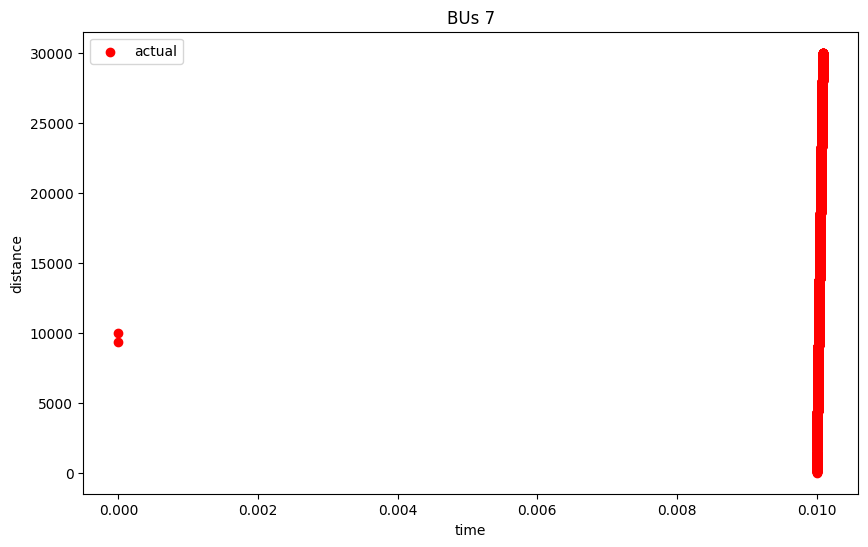

In [ ]:
#prediction = y_pred[:, 0]
distance_train = y_train[:, 1]
time = x_train[:, 1]

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Scatter plot for distance vs. time
#plt.scatter(time, prediction, label='prediction', color='blue', marker='o')

# Scatter plot for distance_2 vs. time
plt.scatter(time, distance_train, label='actual', color='red', marker='o')

# Label for the x-axis and y-axis
plt.xlabel('time')
plt.ylabel('distance')
#plt.xlim(xmin=0.0099,xmax=0.0102)
# Title of the plot
plt.title('BUs 7')

# Show legend
plt.legend()

# Show the plot
#plt.grid(True)
plt.show()

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
normalizer = Normalization()
normalizer.adapt(x_train)
normalizer(x_data)[:5]

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[-0.13345817,  0.07572647],
       [-0.10853148,  0.12838255],
       [-0.11860584,  0.11830787],
       [-0.01755662, -0.04017492],
       [-0.07633919,  0.01860953]], dtype=float32)>

In [ ]:
model = tf.keras.Sequential([
    InputLayer(input_shape = (2,)),
    normalizer,
    Dense(2, activation = "relu"),
    #Dense(128, activation = "relu"),
    #Dense(128, activation = "relu"),
    Dense(2),
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 2)                 5         
 on)                                                             
                                                                 
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 17 (72.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 5 (24.00 Byte)
_________________________________________________________________


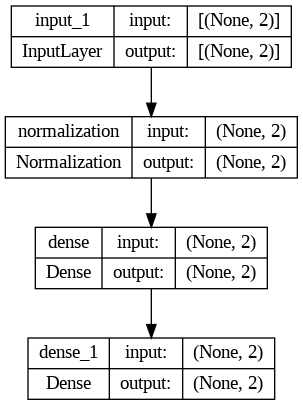

In [ ]:
tf.keras.utils.plot_model(model,to_file = "model.png",show_shapes = True)

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.1),
              loss=MeanAbsoluteError(),
              metrics=RootMeanSquaredError())

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 200, verbose = 1)

Epoch 1/200
110/110 [==============================] - 1s 4ms/step - loss: 14029.0361 - root_mean_squared_error: 16437.9062 - val_loss: 13692.6299 - val_root_mean_squared_error: 16141.0586
Epoch 2/200
110/110 [==============================] - 0s 2ms/step - loss: 12960.7705 - root_mean_squared_error: 15475.0303 - val_loss: 12045.2451 - val_root_mean_squared_error: 14614.3096
Epoch 3/200
110/110 [==============================] - 0s 2ms/step - loss: 10952.7578 - root_mean_squared_error: 13527.4160 - val_loss: 9825.8057 - val_root_mean_squared_error: 12321.3584
Epoch 4/200
110/110 [==============================] - 0s 2ms/step - loss: 8864.0000 - root_mean_squared_error: 11191.2002 - val_loss: 8044.0996 - val_root_mean_squared_error: 10088.6475
Epoch 5/200
110/110 [==============================] - 0s 2ms/step - loss: 7587.2715 - root_mean_squared_error: 9363.3174 - val_loss: 7263.5068 - val_root_mean_squared_error: 8764.7939
Epoch 6/200
110/110 [==============================] - 0s 2ms/

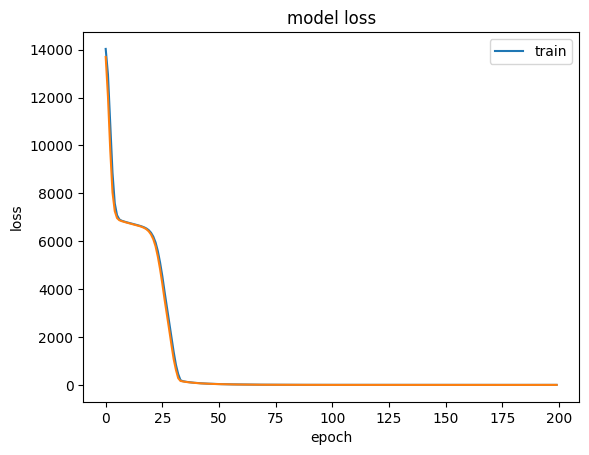

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [ ]:
model.evaluate(test_dataset)

4/4 [==============================] - 0s 4ms/step - loss: 12.5051 - root_mean_squared_error: 402.9089


[12.505070686340332, 402.90887451171875]

In [ ]:
y_pred = model.predict(x_test)

14/14 [==============================] - 0s 2ms/step


In [ ]:
print(y_pred[1])

[ 3575.6177 23565.846 ]


In [ ]:
model.predict(tf.expand_dims(x_test[0], axis = 0 ))


1/1 [==============================] - 0s 21ms/step


array([[11696.84 , 28297.893]], dtype=float32)

In [ ]:
print(y_test[1])

tf.Tensor([ 3575. 23575.], shape=(2,), dtype=float64)


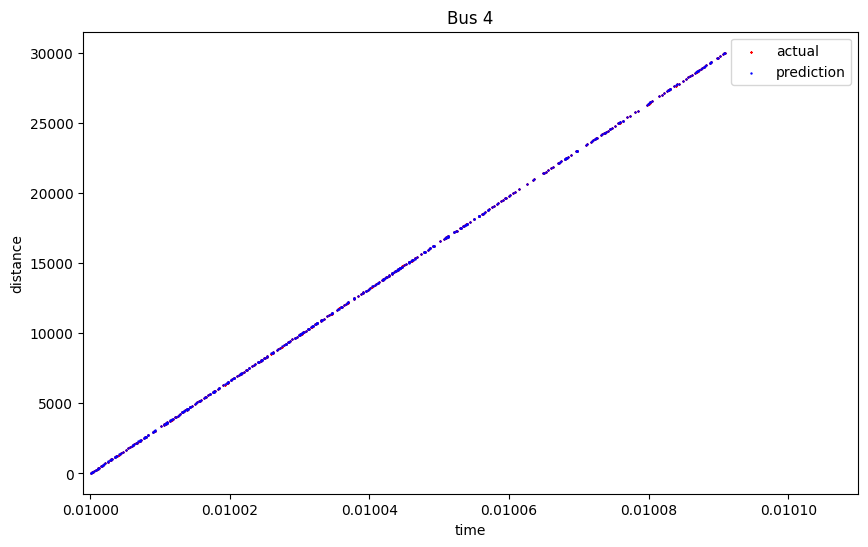

In [50]:
prediction = y_pred[:, 0]
actual = y_test[:, 0]
time = x_test[:, 0]

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Scatter plot for distance vs. time
plt.scatter(time, actual, label='actual', color='red', marker='x', s=1)
plt.scatter(time, prediction, label='prediction', color='blue', marker='o', s=0.5)

# Scatter plot for distance_2 vs. time



#plt.hlines(min_range, ymin=np.min([prediction, actual]), ymax=np.max([prediction, actual]), colors='green', linestyles='dashed', label='min-max range')
#plt.hlines(max_range, ymin=np.min([prediction, actual]), ymax=np.max([prediction, actual]), colors='green', linestyles='dashed')
plt.xlim(0.0099, 0.0102)
# Label for the x-axis and y-axis
plt.xlabel('time')
plt.ylabel('distance')
plt.xlim(xmin=0.009999,xmax=0.01011)
# Title of the plot
plt.title('Bus 4')

# Show legend
plt.legend()

# Show the plot
#plt.grid(True)
plt.show()

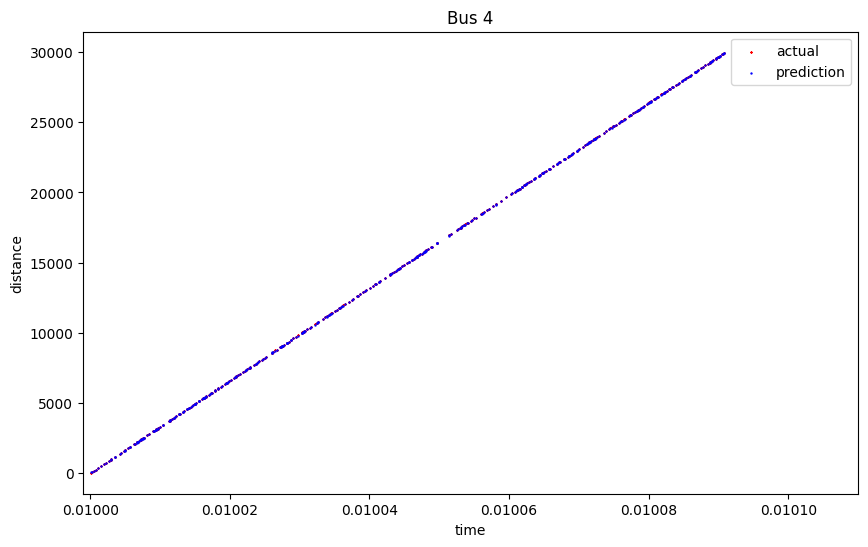

In [51]:
prediction = y_pred[:, 1]
actual = y_test[:, 1]
time = x_test[:, 1]

# Create a figure and axis object
plt.figure(figsize=(10, 6))

# Scatter plot for distance vs. time
plt.scatter(time, actual, label='actual', color='red', marker='x', s=1)
plt.scatter(time, prediction, label='prediction', color='blue', marker='o', s=0.5)

# Scatter plot for distance_2 vs. time



#plt.hlines(min_range, ymin=np.min([prediction, actual]), ymax=np.max([prediction, actual]), colors='green', linestyles='dashed', label='min-max range')
#plt.hlines(max_range, ymin=np.min([prediction, actual]), ymax=np.max([prediction, actual]), colors='green', linestyles='dashed')
plt.xlim(0.0099, 0.0102)
# Label for the x-axis and y-axis
plt.xlabel('time')
plt.ylabel('distance')
plt.xlim(xmin=0.009999,xmax=0.01011)
# Title of the plot
plt.title('Bus 4')

# Show legend
plt.legend()

# Show the plot
#plt.grid(True)
plt.show()

In [ ]:
def get_loc(d_4,d_7):
  bus_1 = 0
  bus_2 = 0
  dis = 0
  if d_4 <= 10000:
    bus_1 = 4
    if d_7 <= 20000:
      bus_2 = 5
    else:
      bus_2 = 6
    dis = d_4
  elif 10000 <= d_4 <= 20000:
    if d_7 <= 10000:
      bus_1 = 5
      bus_2 = 7
    else:
      bus_1 = 6
      bus_2 = 9
    dis = d_4-10000
  else:
    if d_7 <= 10000:
      bus_1 = 7
      bus_2 = 8
    else:
      bus_1 = 8
      bus_2 = 9
    dis = d_7
  return bus_1,bus_2,dis

In [ ]:
for i in range(len(y_pred)):
  print(get_loc(y_pred[i,0],y_pred[i,1]))

(6, 9, 1696.83984375)
(4, 6, 3575.6177)
(4, 6, 7517.105)
(6, 9, 649.9853515625)
(4, 6, 1704.0874)
(8, 9, 12606.239)
(8, 9, 18539.963)
(4, 6, 6346.2075)
(6, 9, 4746.8125)
(5, 7, 9822.314453125)
(4, 5, 5800.4937)
(4, 6, 5200.191)
(4, 6, 6453.406)
(5, 7, 4348.8271484375)
(5, 7, 4653.763671875)
(4, 5, 7976.806)
(4, 6, 1176.3848)
(4, 5, 3624.1802)
(4, 6, 4499.2505)
(6, 9, 8497.548828125)
(5, 7, 21.0732421875)
(4, 6, 3625.0698)
(5, 7, 293.150390625)
(4, 6, 4053.8662)
(5, 7, 3945.009765625)
(4, 6, 8654.829)
(5, 7, 3343.123046875)
(4, 5, 8619.844)
(7, 8, 3852.3323)
(4, 6, 2602.8394)
(6, 9, 3024.0625)
(4, 5, 2280.6812)
(8, 9, 15696.675)
(4, 6, 7945.5933)
(7, 8, 5138.426)
(5, 7, 3771.8134765625)
(5, 7, 5997.568359375)
(5, 7, 696.96875)
(4, 6, 2619.1182)
(4, 6, 8077.6724)
(5, 7, 2189.0966796875)
(4, 6, 1028.0259)
(4, 5, 5676.737)
(5, 7, 7926.37109375)
(6, 9, 427.349609375)
(7, 8, 8740.594)
(5, 7, 4620.904296875)
(5, 7, 7802.615234375)
(4, 5, 6806.197)
(4, 5, 4127.184)
(5, 7, 4274.5126953125)
(6, 

In [ ]:
bus_4_avg_error = 0
bus_7_avg_error = 0
for i in range(len(y_pred)):
  bus_4_avg_error += abs(y_pred[i,0] - y_test[i,0])
  bus_7_avg_error += abs(y_pred[i,1] - y_test[i,1])
bus_4_avg_error = bus_4_avg_error/len(y_pred)
bus_7_avg_error = bus_7_avg_error/len(y_pred)

print("Bus 4 avg error ", bus_4_avg_error.numpy(),"m")
print("Bus 7 avg error ", bus_7_avg_error.numpy(),"m")

Bus 4 avg error  3.4743242610584604 m
Bus 7 avg error  5.0334775057705965 m


In [ ]:
mape_4 = 100 * tf.reduce_mean(tf.abs((y_test[:, 0] - y_pred[:, 0]) / y_test[:, 0])).numpy()
mape_7 = 100 * tf.reduce_mean(tf.abs((y_test[:, 1] - y_pred[:, 1]) / y_test[:, 1])).numpy()

print("Bus 4 MAPE:", mape_4, "%")
print("Bus 7 MAPE:", mape_7, "%")

Bus 4 MAPE: 0.08544887193503772 %
Bus 7 MAPE: 0.17466158024209674 %
